In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('training_.csv')
df.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       1048 non-null   int64 
 1   Timestamp                  1048 non-null   object
 2   Age                        1048 non-null   int64 
 3   Gender                     1048 non-null   object
 4   Country                    1048 non-null   object
 5   state                      636 non-null    object
 6   self_employed              1030 non-null   object
 7   family_history             1048 non-null   object
 8   treatment                  1048 non-null   object
 9   work_interfere             812 non-null    object
 10  no_employees               1048 non-null   object
 11  remote_work                1048 non-null   object
 12  tech_company               1048 non-null   object
 13  benefits                   1048 non-null   object
 14  care_opt

### Data Cleaning

In [4]:
df.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        412
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64

In [5]:
df.drop(['comments','Timestamp'], axis=1, inplace=True)
df.head()

,S.No,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,3,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,4,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,5,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [12]:
df.nunique()

S.No                         1048
Age                            50
Gender                         45
Country                        42
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
dtype: int64

In [11]:
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr'], dtype=object)

In [33]:
a = ['M','male','Male-ish','maile','something kinda male?','Cis Male','Mal','Male (CIS)','non-binary','Make','Nah','All',
    'Enby','Guy (-ish) ^_^','msle','Neuter','queer','Mail','cis male','Malr','m','Man']
df.Gender.replace(a,'Male', inplace = True)

In [34]:
b = ['female','f','Trans-female', 'Cis Female', 'F','queer/she/they','fluid', 'Genderqueer', 'Female ', 'Androgyne',
     'Agender','Femake', 'woman','cis-female/femme','male leaning androgynous','Male ','Trans woman','Female (cis)',
    'Woman','Female (trans)','A little about you']
df.Gender.replace(b,'Female',inplace = True)

In [35]:
df.Gender.value_counts()

Male      834
Female    214
Name: Gender, dtype: int64

In [45]:
df.Country.isnull().sum()

0

In [43]:
df.Country.value_counts()

United States             644
United Kingdom            153
Canada                     64
Germany                    37
Netherlands                18
Australia                  18
Ireland                    13
France                     11
India                       8
Italy                       6
Sweden                      6
Switzerland                 6
New Zealand                 6
Poland                      5
Brazil                      5
Israel                      4
Belgium                     4
South Africa                4
Austria                     3
Mexico                      3
Bulgaria                    3
Russia                      3
Denmark                     2
Finland                     2
Singapore                   2
Portugal                    2
Zimbabwe                    1
Bosnia and Herzegovina      1
Thailand                    1
Bahamas, The                1
Colombia                    1
Uruguay                     1
Croatia                     1
Costa Rica

In [44]:
df.state.isnull().sum()

412

In [47]:
df.state.fillna(method='pad',inplace=True)

In [53]:
df.self_employed.value_counts()

No     906
Yes    124
Name: self_employed, dtype: int64

In [46]:
df.self_employed.isnull().sum()

18

In [54]:
df.self_employed.fillna(method='bfill', inplace=True)

In [56]:
df.self_employed.value_counts()

No     906
Yes    142
Name: self_employed, dtype: int64

In [57]:
df

,S.No,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1,37,Female,United States,IL,Yes,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2,44,Male,United States,IN,Yes,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,3,32,Male,Canada,IN,Yes,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,4,31,Male,United Kingdom,IN,Yes,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,5,31,Male,United States,TX,Yes,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,1044,26,Male,United States,WA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,Yes,No,No,Yes,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No
1044,1045,29,Female,United Kingdom,WA,No,No,Yes,Often,More than 1000,No,No,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,Yes,No,Yes
1045,1046,26,Female,Canada,WA,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Not sure,No,No,Yes,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No
1046,1047,33,Male,Italy,WA,No,Yes,Yes,Sometimes,6-25,No,Yes,No,Not sure,No,No,Don't know,Somewhat easy,No,No,Some of them,Yes,No,No,Don't know,No


In [61]:
df.work_interfere.isnull().sum()

236

In [62]:
df.work_interfere.fillna(method='ffill', inplace=True)

### Feature Engineering

<AxesSubplot:xlabel='treatment', ylabel='count'>

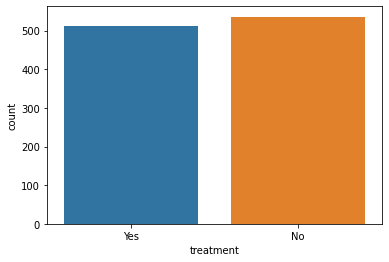

In [65]:
sns.countplot(df.treatment)

In [68]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).sum()

Age                          33
Country                       0
Gender                        0
S.No                          0
anonymity                     0
benefits                      0
care_options                  0
coworkers                     0
family_history                0
leave                         0
mental_health_consequence     0
mental_health_interview       0
mental_vs_physical            0
no_employees                  0
obs_consequence               0
phys_health_consequence       0
phys_health_interview         0
remote_work                   0
seek_help                     0
self_employed                 0
state                         0
supervisor                    0
tech_company                  0
treatment                     0
wellness_program              0
work_interfere                0
dtype: int64

In [69]:
df.Age.value_counts()

 29             73
 32             64
 33             63
 26             63
 27             61
 31             57
 28             56
 30             56
 34             52
 35             49
 25             48
 23             41
 24             38
 37             36
 36             31
 38             30
 39             26
 40             26
 43             23
 22             20
 42             17
 21             15
 41             15
 45              9
 19              9
 44              8
 46              7
 18              7
 50              5
 48              5
 49              4
 51              4
 20              4
 54              3
 57              3
 56              3
 55              3
 47              2
 8               1
 99999999999     1
-1726            1
 53              1
 58              1
 60              1
 61              1
 62              1
 65              1
 329             1
-29              1
 5               1
Name: Age, dtype: int64

In [75]:
df[df['Age'] >=100 ]

,S.No,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
364,365,329,Male,United States,OH,No,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No
390,391,99999999999,Male,Zimbabwe,CA,Yes,Yes,Yes,Often,1-5,No,Yes,No,Yes,No,No,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes


In [76]:
df[df['Age'] <= 0 ]

,S.No,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
143,144,-29,Male,United States,MN,No,No,No,Never,More than 1000,Yes,No,Yes,No,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
715,716,-1726,Male,United Kingdom,PA,No,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No


In [77]:
df.shape

(1048, 26)

In [79]:
df.drop(df[df['Age'] > 100].index, inplace = True)

In [80]:
df.shape

(1046, 26)

In [81]:
df.drop(df[df['Age'] < 0].index, inplace = True)

In [82]:
df.shape

(1044, 26)

In [94]:
df.drop(['state','S.No'], axis=1, inplace=True)

In [96]:
df.nunique()

Age                          46
Gender                        2
Country                      41
self_employed                 2
family_history                2
treatment                     2
work_interfere                4
no_employees                  6
remote_work                   2
tech_company                  2
benefits                      3
care_options                  3
wellness_program              3
seek_help                     3
anonymity                     3
leave                         5
mental_health_consequence     3
phys_health_consequence       3
coworkers                     3
supervisor                    3
mental_health_interview       3
phys_health_interview         3
mental_vs_physical            3
obs_consequence               2
dtype: int64

In [108]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,1,0,Yes,3,6-25,0,1,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,0
1,44,Male,United States,1,0,No,1,More than 1000,0,0,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,0
2,32,Male,Canada,1,0,No,1,6-25,0,1,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,0
3,31,Male,United Kingdom,1,1,Yes,3,26-100,0,1,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,1
4,31,Male,United States,1,0,No,0,100-500,1,1,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,0


In [98]:
df.self_employed.replace({'No':0, 'Yes':1}, inplace = True)

In [100]:
df.family_history.replace({'No':0, 'Yes':1}, inplace = True)

In [102]:
df.remote_work.replace({'No':0, 'Yes':1}, inplace = True)

In [103]:
df.tech_company.replace({'No':0, 'Yes':1}, inplace = True)

In [105]:
df.obs_consequence.replace({'No':0, 'Yes':1}, inplace = True)

In [106]:
df.work_interfere.value_counts()

Sometimes    501
Never        229
Rarely       177
Often        137
Name: work_interfere, dtype: int64

In [107]:
df.work_interfere.replace({'Never':0, 'Rarely':1, 'Sometimes':2, 'Often':3}, inplace = True)

In [109]:
gender = pd.get_dummies(df.Gender, drop_first=True)
gender.head()

,Male
0,0
1,1
2,1
3,1
4,1


In [110]:
country = pd.get_dummies(df.Country, drop_first=True)
country.head()

,Austria,"Bahamas, The",Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Colombia,Costa Rica,Croatia,Denmark,Finland,France,Germany,Hungary,India,Ireland,Israel,Italy,Japan,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [111]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,1,0,Yes,3,6-25,0,1,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,0
1,44,Male,United States,1,0,No,1,More than 1000,0,0,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,0
2,32,Male,Canada,1,0,No,1,6-25,0,1,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,0
3,31,Male,United Kingdom,1,1,Yes,3,26-100,0,1,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,1
4,31,Male,United States,1,0,No,0,100-500,1,1,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,0


In [112]:
cols = ['no_employees','benefits','care_options','wellness_program','seek_help','anonymity','leave','mental_health_consequence',
       'phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview',
        'mental_vs_physical']
all = pd.get_dummies(data=df, columns= cols, drop_first=True)

In [113]:
all.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,obs_consequence,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000,benefits_No,benefits_Yes,care_options_Not sure,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,anonymity_No,anonymity_Yes,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes
0,37,Female,United States,1,0,Yes,3,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1
1,44,Male,United States,1,0,No,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,32,Male,Canada,1,0,No,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0
3,31,Male,United Kingdom,1,1,Yes,3,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0
4,31,Male,United States,1,0,No,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0


In [115]:
df1 = pd.concat([all,gender,country], axis=1)
df1.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,obs_consequence,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000,benefits_No,benefits_Yes,care_options_Not sure,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,anonymity_No,anonymity_Yes,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,Male,Austria,"Bahamas, The",Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Colombia,Costa Rica,Croatia,Denmark,Finland,France,Germany,Hungary,India,Ireland,Israel,Italy,Japan,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay
0,37,Female,United States,1,0,Yes,3,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,44,Male,United States,1,0,No,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,32,Male,Canada,1,0,No,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,31,Male,United Kingdom,1,1,Yes,3,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,31,Male,United States,1,0,No,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [116]:
df1.drop(['Gender','Country'],axis=1, inplace=True)
df1.head()

,Age,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,obs_consequence,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000,benefits_No,benefits_Yes,care_options_Not sure,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,anonymity_No,anonymity_Yes,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,Male,Austria,"Bahamas, The",Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Colombia,Costa Rica,Croatia,Denmark,Finland,France,Germany,Hungary,India,Ireland,Israel,Italy,Japan,Latvia,Mexico,Netherlands,New Zealand,Nigeria,Norway,Poland,Portugal,Romania,Russia,Singapore,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay
0,37,1,0,Yes,3,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,44,1,0,No,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,32,1,0,No,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,31,1,1,Yes,3,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,31,1,0,No,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [122]:
df1.treatment.replace({'No':0, 'Yes':1}, inplace = True)

### Feature Selection

In [124]:
x = df1.drop('treatment', axis=1)
y = df1.treatment

In [125]:
from sklearn.ensemble import ExtraTreesRegressor
imp = ExtraTreesRegressor()
imp.fit(x,y)

ExtraTreesRegressor()

In [126]:
print(imp.feature_importances_)

[4.29019800e-02 1.75509705e-02 1.25457887e-01 1.47820435e-01
 2.06783052e-02 1.48592924e-02 1.95560675e-02 1.36666134e-02
 1.93674325e-02 1.31971019e-02 1.89898555e-02 2.19889144e-02
 1.33315281e-02 1.49828221e-02 9.31362534e-03 5.03817521e-02
 8.76896966e-03 1.05977148e-02 1.52260910e-02 9.68947778e-03
 2.49137188e-03 2.52252338e-02 1.71180256e-02 1.65681683e-02
 1.14769132e-02 7.48163222e-03 2.02727928e-02 1.52478727e-02
 1.48890239e-02 1.11289960e-02 2.39741743e-02 1.55469188e-02
 1.67233734e-02 1.86756959e-02 1.15467158e-02 6.13205473e-03
 1.83519479e-02 9.90436519e-03 1.68718145e-02 9.39266031e-03
 1.91278312e-02 2.48214917e-03 0.00000000e+00 1.02234545e-04
 1.72520794e-05 4.82240525e-04 4.57745695e-04 9.55563269e-03
 0.00000000e+00 7.66759084e-05 0.00000000e+00 0.00000000e+00
 1.11819033e-04 7.38394753e-04 9.32194792e-04 2.58052261e-03
 3.93900681e-03 4.53817585e-03 4.91086788e-04 1.37623425e-04
 1.27793181e-04 0.00000000e+00 2.35139452e-04 3.18574212e-03
 2.91660197e-03 0.000000

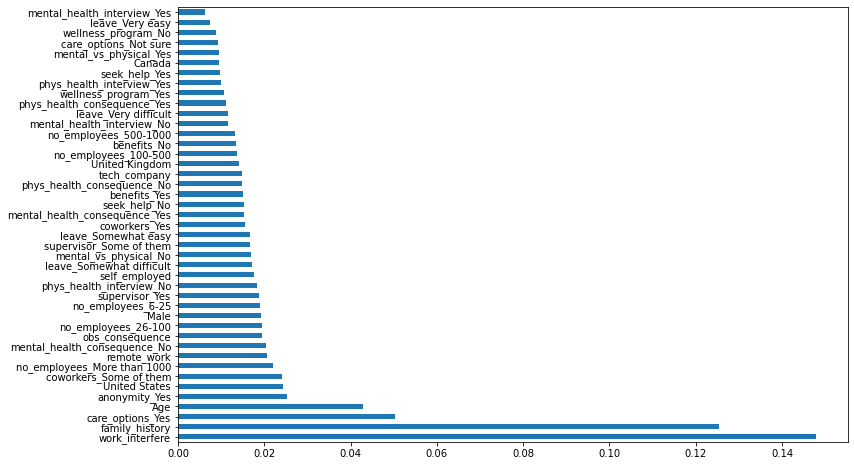

In [134]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(imp.feature_importances_, index=x.columns)
feat_importances.nlargest(43).plot(kind='barh')
plt.show()

In [135]:
feat_importances.nlargest(43)

work_interfere                   0.147820
family_history                   0.125458
care_options_Yes                 0.050382
Age                              0.042902
anonymity_Yes                    0.025225
United States                    0.024422
coworkers_Some of them           0.023974
no_employees_More than 1000      0.021989
remote_work                      0.020678
mental_health_consequence_No     0.020273
obs_consequence                  0.019556
no_employees_26-100              0.019367
Male                             0.019128
no_employees_6-25                0.018990
supervisor_Yes                   0.018676
phys_health_interview_No         0.018352
self_employed                    0.017551
leave_Somewhat difficult         0.017118
mental_vs_physical_No            0.016872
supervisor_Some of them          0.016723
leave_Somewhat easy              0.016568
coworkers_Yes                    0.015547
mental_health_consequence_Yes    0.015248
seek_help_No                     0

### Model Seletion

### Random Forest

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

params = {
    'n_estimators'             : [int(x) for x in np.linspace(start=100, stop=1200, num=12)],
    'max_features'             : ['auto','sqrt','log2'],
    'min_samples_split'        : [2, 5, 7, 9, 10, 15, 20, 50, 100],
    'min_weight_fraction_leaf' :[0.0,0.05,0.5],
    'min_samples_leaf'         :[1, 2, 3, 5, 10],
    'max_depth'                : [int(x) for x in np.linspace(start=5, stop=30, num=6)]
}

rf_grid = RandomizedSearchCV(rf,params, cv=5, n_iter=10, verbose=2, random_state=42)

rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25, total=   0.6s
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25, total=   0.6s
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25, total=   0.6s
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25, total=   0.7s
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25, total=   0.6s
[CV] n_estimators=400, min_weight_fraction_leaf=0.5

[CV]  n_estimators=500, min_weight_fraction_leaf=0.05, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.9s
[CV] n_estimators=500, min_weight_fraction_leaf=0.05, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=500, min_weight_fraction_leaf=0.05, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.9s
[CV] n_estimators=500, min_weight_fraction_leaf=0.05, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=500, min_weight_fraction_leaf=0.05, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.9s
[CV] n_estimators=300, min_weight_fraction_leaf=0.05, min_samples_split=7, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.05, min_samples_split=7, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.6s
[CV] n_estimators=300, min_weight_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   42.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 5, 10],
                                        'min_samples_split': [2, 5, 7, 9, 10,
                                                              15, 20, 50, 100],
                                        'min_weight_fraction_leaf': [0.0, 0.05,
                                                                     0.5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, ve

In [145]:
rf_grid.best_params_

{'n_estimators': 100,
 'min_weight_fraction_leaf': 0.05,
 'min_samples_split': 100,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [146]:
rf_grid.best_score_

0.7401197604790419

In [147]:
y_pred = rf_grid.predict(X_test)

In [150]:
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.82      0.75      0.78       109

    accuracy                           0.78       209
   macro avg       0.79      0.79      0.78       209
weighted avg       0.79      0.78      0.78       209



In [151]:
f1_score(y_test,y_pred)

0.784688995215311

### XGB

In [153]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [154]:
params = {
    'n_estimators'       : [int(x) for x in np.linspace(start=100, stop=1200, num=12)],
    'booster'            : ['gbtree', "dart", "gblinear"],
    'gamma'              : [0,1,2,3,5,5,6,7,8,9,10],
    'learning_rate'      : [0.05, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    'subsample'          : [0.7, 0.6, 0.8],
    'min_child_weight'   :[2, 3, 5, 6, 7, 8],
    'max_depth'          : [int(x) for x in np.linspace(start=5, stop=30, num=6)]
}

In [155]:
xg_random = RandomizedSearchCV(model, params, cv=5, n_iter=100, verbose=2, n_jobs=1)

In [156]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=6, booster=gblinear 
[22:32:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=6, booster=gblinear, total=   0.2s
[CV] subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=6, booster=gblinear 
[22:32:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=6, booster=gblinear, total=   0.2s
[CV] subsample=0.8, n_estimators=600, min_c

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=6, booster=gblinear, total=   0.1s
[CV] subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=6, booster=gblinear 
[22:32:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  subsample=0.8, n_estimators=600, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=6, booster=gblinear, total=   0.1s
[CV] subsample=0.8, n_estimators=600, min_c

[CV]  subsample=0.7, n_estimators=900, min_child_weight=2, max_depth=15, learning_rate=0.5, gamma=2, booster=dart, total=   2.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=2, booster=dart 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=2, booster=dart, total=   1.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=2, booster=dart 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=2, booster=dart, total=   1.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=2, booster=dart 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=2, booster=dart, total=   1.6s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=2, booster=dart 
[CV]  subsample=0.6, n_estim

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=8, max_depth=20, learning_rate=0.1, gamma=5, booster=gblinear, total=   0.2s
[CV] subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=15, learning_rate=0.05, gamma=5, booster=dart 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=15, learning_rate=0.05, gamma=5, booster=dart, total=   1.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=15, learning_rate=0.05, gamma=5, booster=dart 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=15, learning_rate=0.05, gamma=5, booster=dart, total=   1.6s
[CV] subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=15, learning_rate=0.05, gamma=5, booster=dart 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=15, learning_rate=0.05, gamma=5, booster=dart, total=   1.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=8, max_depth=15, learning_rate=0.05, gamma=5, booster=dart 
[CV]  subsample=

[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=25, learning_rate=0.1, gamma=5, booster=gbtree, total=   1.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=25, learning_rate=0.1, gamma=5, booster=gbtree 
[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=25, learning_rate=0.1, gamma=5, booster=gbtree, total=   1.2s
[CV] subsample=0.7, n_estimators=400, min_child_weight=3, max_depth=5, learning_rate=0.6, gamma=5, booster=gblinear 
[22:34:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=20, learning_rate=0.2, gamma=8, booster=gblinear, total=   0.2s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=20, learning_rate=0.2, gamma=8, booster=gblinear 
[22:34:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=20, learning_rate=0.2, gamma=8, booster=gblinear, total=   0.2s
[CV] subsample=0.6, n_estimators=1000, m

[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.6, gamma=10, booster=gbtree, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.6, gamma=10, booster=gbtree 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.6, gamma=10, booster=gbtree, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.6, gamma=10, booster=gbtree 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.6, gamma=10, booster=gbtree, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.6, gamma=10, booster=gbtree 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.6, gamma=10, booster=gbtree, total=   0.3s
[CV] subsample=0.6, n_estimators=200, min_child_weight=8, max_depth=10, learning_rate=0.01, gamma=1, booster=gbtree 
[CV]

[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=10, booster=gblinear, total=   0.0s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=10, booster=gblinear 
[22:35:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=10, booster=gblinear, total=   0.0s
[CV] subsample=0.6, n_estimators=100, min_c

[CV]  subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=30, learning_rate=0.01, gamma=10, booster=gblinear, total=   0.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=10, learning_rate=0.1, gamma=8, booster=gblinear 
[22:35:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=10, learning_rate=0.1, gamma=8, booster=gblinear, total=   0.1s
[CV] subsample=0.8, n_estimators=200, min

[CV]  subsample=0.6, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.6, gamma=1, booster=gbtree, total=   0.7s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.6, gamma=1, booster=gbtree 
[CV]  subsample=0.6, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.6, gamma=1, booster=gbtree, total=   0.7s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.6, gamma=1, booster=gbtree 
[CV]  subsample=0.6, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.6, gamma=1, booster=gbtree, total=   0.7s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.6, gamma=1, booster=gbtree 
[CV]  subsample=0.6, n_estimators=1000, min_child_weight=8, max_depth=30, learning_rate=0.6, gamma=1, booster=gbtree, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=8, max_depth=5, learning_rate=0.2, gamma=9, booster=dart 
[CV]  su

[CV]  subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=20, learning_rate=0.2, gamma=8, booster=gbtree, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=20, learning_rate=0.2, gamma=8, booster=gbtree 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=20, learning_rate=0.2, gamma=8, booster=gbtree, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=15, learning_rate=0.1, gamma=0, booster=gblinear 
[22:35:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through 

[CV]  subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=20, learning_rate=0.01, gamma=5, booster=dart, total=   1.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=20, learning_rate=0.01, gamma=5, booster=dart 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=20, learning_rate=0.01, gamma=5, booster=dart, total=   1.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=20, learning_rate=0.01, gamma=5, booster=dart 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=20, learning_rate=0.01, gamma=5, booster=dart, total=   1.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=20, learning_rate=0.01, gamma=5, booster=dart 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=20, learning_rate=0.01, gamma=5, booster=dart, total=   1.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=8, max_depth=20, learning_rate=0.01, gamma=5, booster=dart 
[CV]  subsample=0.8,

[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=30, learning_rate=0.4, gamma=7, booster=gblinear, total=   0.2s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=30, learning_rate=0.4, gamma=7, booster=gblinear 
[22:36:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=30, learning_rate=0.4, gamma=7, booster=gblinear, total=   0.2s
[CV] subsample=0.7, n_estimators=1200, min_

[CV]  subsample=0.8, n_estimators=1200, min_child_weight=2, max_depth=15, learning_rate=0.3, gamma=1, booster=gblinear, total=   0.2s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=2, max_depth=15, learning_rate=0.3, gamma=1, booster=gblinear 
[22:36:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=2, max_depth=15, learning_rate=0.3, gamma=1, booster=gblinear, total=   0.2s
[CV] subsample=0.8, n_estimators=1200, m

[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=30, learning_rate=0.2, gamma=5, booster=gbtree, total=   0.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=0, booster=gblinear 
[22:36:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=30, learning_rate=0.05, gamma=0, booster=gblinear, total=   0.1s
[CV] subsample=0.8, n_estimators=500, min_c

[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.2, gamma=7, booster=gblinear, total=   0.1s
[CV] subsample=0.7, n_estimators=400, min_child_weight=8, max_depth=15, learning_rate=0.05, gamma=3, booster=gbtree 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=8, max_depth=15, learning_rate=0.05, gamma=3, booster=gbtree, total=   0.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=8, max_depth=15, learning_rate=0.05, gamma=3, booster=gbtree 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=8, max_depth=15, learning_rate=0.05, gamma=3, booster=gbtree, total=   0.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=8, max_depth=15, learning_rate=0.05, gamma=3, booster=gbtree 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=8, max_depth=15, learning_rate=0.05, gamma=3, booster=gbtree, total=   0.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=8, max_depth=15, learning_rate=0.05, gamma=3, booster=gbtree 
[CV

[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=5, booster=gblinear, total=   0.3s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=5, booster=gblinear 
[22:37:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=5, booster=gblinear, total=   0.2s
[CV] subsample=0.7, n_estimators=1200

[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=3, booster=gbtree, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=3, booster=gbtree 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=3, booster=gbtree, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=3, booster=gbtree 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=3, booster=gbtree, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=3, booster=gbtree 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=3, booster=gbtree, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.2, gamma=3, booster=gbtree 
[CV]  subsam

[CV]  subsample=0.8, n_estimators=1200, min_child_weight=2, max_depth=25, learning_rate=0.2, gamma=2, booster=gblinear, total=   0.2s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=2, max_depth=25, learning_rate=0.2, gamma=2, booster=gblinear 
[22:37:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=2, max_depth=25, learning_rate=0.2, gamma=2, booster=gblinear, total=   0.3s
[CV] subsample=0.8, n_estimators=1200, m

[CV]  subsample=0.6, n_estimators=1100, min_child_weight=8, max_depth=25, learning_rate=0.2, gamma=1, booster=gblinear, total=   0.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=7, booster=dart 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=7, booster=dart, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=7, booster=dart 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=7, booster=dart, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=7, booster=dart 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=7, booster=dart, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=7, booster=dart 
[CV]  subsample=

[CV]  subsample=0.8, n_estimators=400, min_child_weight=6, max_depth=10, learning_rate=0.6, gamma=3, booster=dart, total=   0.6s
[CV] subsample=0.8, n_estimators=400, min_child_weight=6, max_depth=10, learning_rate=0.6, gamma=3, booster=dart 
[CV]  subsample=0.8, n_estimators=400, min_child_weight=6, max_depth=10, learning_rate=0.6, gamma=3, booster=dart, total=   0.6s
[CV] subsample=0.8, n_estimators=400, min_child_weight=6, max_depth=10, learning_rate=0.6, gamma=3, booster=dart 
[CV]  subsample=0.8, n_estimators=400, min_child_weight=6, max_depth=10, learning_rate=0.6, gamma=3, booster=dart, total=   0.6s
[CV] subsample=0.8, n_estimators=400, min_child_weight=6, max_depth=10, learning_rate=0.6, gamma=3, booster=dart 
[CV]  subsample=0.8, n_estimators=400, min_child_weight=6, max_depth=10, learning_rate=0.6, gamma=3, booster=dart, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=30, learning_rate=0.01, gamma=8, booster=gbtree 
[CV]  subsample=0.7, n_es

[CV]  subsample=0.7, n_estimators=1000, min_child_weight=8, max_depth=5, learning_rate=0.2, gamma=0, booster=dart, total=   4.4s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=8, max_depth=5, learning_rate=0.2, gamma=0, booster=dart 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=8, max_depth=5, learning_rate=0.2, gamma=0, booster=dart, total=   4.3s
[CV] subsample=0.7, n_estimators=600, min_child_weight=2, max_depth=20, learning_rate=0.2, gamma=8, booster=gblinear 
[22:38:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
 

[CV]  subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=25, learning_rate=0.2, gamma=1, booster=gblinear, total=   0.2s
[CV] subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=25, learning_rate=0.2, gamma=1, booster=gblinear 
[22:38:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=25, learning_rate=0.2, gamma=1, booster=gblinear, total=   0.1s
[CV] subsample=0.7, n_estimators=700, min_c

[CV]  subsample=0.8, n_estimators=200, min_child_weight=8, max_depth=5, learning_rate=0.3, gamma=8, booster=gblinear, total=   0.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=8, max_depth=5, learning_rate=0.3, gamma=8, booster=gblinear 
[22:38:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  subsample=0.8, n_estimators=200, min_child_weight=8, max_depth=5, learning_rate=0.3, gamma=8, booster=gblinear, total=   0.0s
[CV] subsample=0.7, n_estimators=400, min_chil

[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=30, learning_rate=0.4, gamma=5, booster=gblinear, total=   0.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=30, learning_rate=0.4, gamma=5, booster=gblinear 
[22:39:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=30, learning_rate=0.4, gamma=5, booster=gblinear, total=   0.2s
[CV] subsample=0.7, n_estimators=400, min_c

[CV]  subsample=0.6, n_estimators=1100, min_child_weight=6, max_depth=30, learning_rate=0.4, gamma=3, booster=gblinear, total=   0.2s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=6, max_depth=30, learning_rate=0.4, gamma=3, booster=gblinear 
[22:39:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=6, max_depth=30, learning_rate=0.4, gamma=3, booster=gblinear, total=   0.2s
[CV] subsample=0.6, n_estimators=1100, m

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.4min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_pa...
                                           verbosity=None),
                   n_iter=100, n_jobs=1,
                   param_distributi

In [157]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 200,
 'min_child_weight': 7,
 'max_depth': 15,
 'learning_rate': 0.01,
 'gamma': 7,
 'booster': 'dart'}

In [158]:
xg_random.best_score_

0.7437125748502995

In [159]:
predictions = xg_random.predict(X_test)

In [160]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.82      0.75      0.78       109

    accuracy                           0.78       209
   macro avg       0.79      0.79      0.78       209
weighted avg       0.79      0.78      0.78       209



In [161]:
f1_score(y_test,y_pred)

0.784688995215311